# lab regression exercise
## Shang mingxia P-COM0077/19

## 1. Import the function to download the dataset.

In [50]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes 
diabetes = load_diabetes()

## 2. Analyze the dataset to determine the useful features for the regression model. 
### 2a. What typeof features of the data? 
    numerical
### 2b. Which features have high correlation with the target? 
    bmi,s5,bp,s4,s3,s6
### 2c. Plot the correlation using scatter matrix.

In [51]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [52]:
print(diabetes.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [53]:
df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [54]:
df['quantitative'] = diabetes.target

In [55]:
df.dtypes

age             float64
sex             float64
bmi             float64
bp              float64
s1              float64
s2              float64
s3              float64
s4              float64
s5              float64
s6              float64
quantitative    float64
dtype: object

In [56]:
corr_matrix = df.corr() 
corr_matrix['quantitative'].sort_values(ascending=True)

s3             -0.394789
sex             0.043062
s2              0.174054
age             0.187889
s1              0.212022
s6              0.382483
s4              0.430453
bp              0.441484
s5              0.565883
bmi             0.586450
quantitative    1.000000
Name: quantitative, dtype: float64

In [57]:
df_corr=abs(df.corr())
df_corr['quantitative'].sort_values(ascending=False)

quantitative    1.000000
bmi             0.586450
s5              0.565883
bp              0.441484
s4              0.430453
s3              0.394789
s6              0.382483
s1              0.212022
age             0.187889
s2              0.174054
sex             0.043062
Name: quantitative, dtype: float64

In [58]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'quantitative'],
      dtype='object')

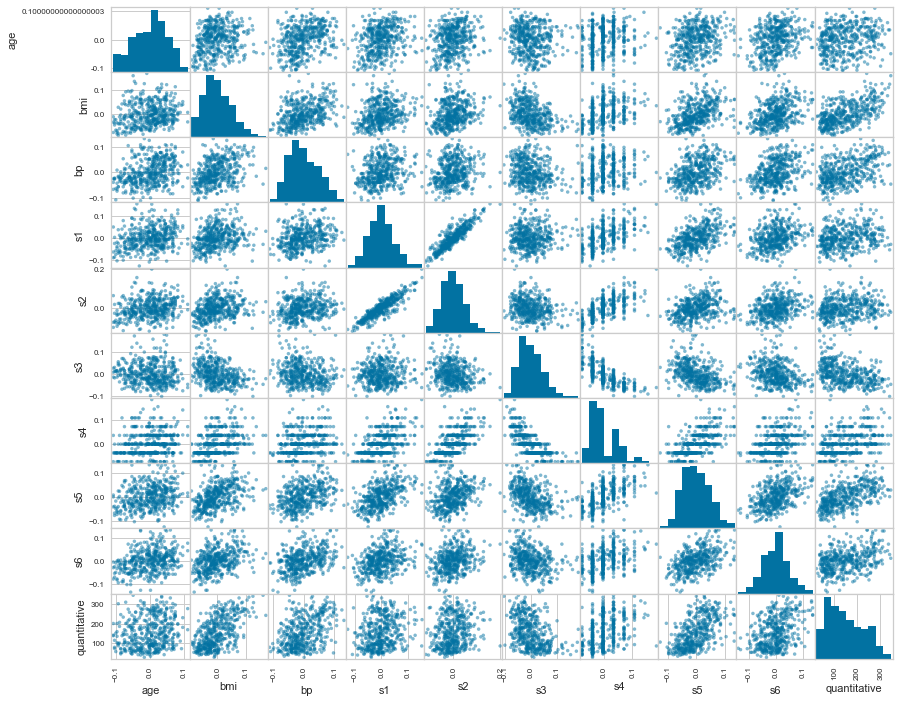

In [40]:
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df.drop(columns=['sex'],axis=1), figsize=(14,12))
plt.show()

## 3. Split the dataset into training and testing sets.

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1])

## 4. Develop the regression model using Linear Regression technique.

In [60]:
from sklearn.linear_model import LinearRegression 
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_train, y_train)

0.5226202103380304

## 5. Print the estimated coefficients of the model.

In [61]:
print('Coefficients: ', regression_model.coef_)

Coefficients:  [ -74.52070073 -251.09401625  538.237541    348.07070124 -856.95741559
  481.40567938  163.04868102  176.85598098  770.61547819   82.40914298]


## 6. Evaluate the regression model using mean absolute error.

In [62]:
y_pred = regression_model.predict(X_test)

In [63]:
from sklearn.metrics import mean_absolute_error 
print(mean_absolute_error(y_test, y_pred))

45.55786859396474


## 7.Evaluate the regression model using mean squared error and R2-squared. 

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 3135.53
R2 score: 0.49


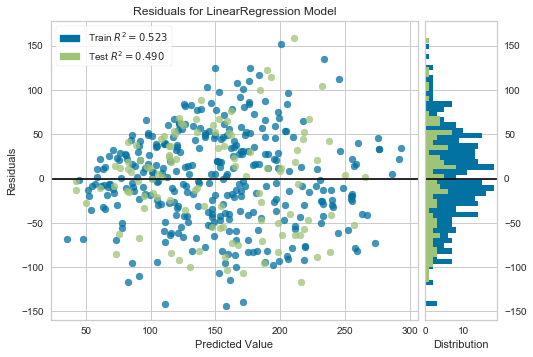

In [66]:
from yellowbrick.regressor import ResidualsPlot 
res_plot = ResidualsPlot(regression_model) 
res_plot.fit(X_train, y_train) 
res_plot.score(X_test, y_test)
res_plot.poof()